In [123]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Building a basic network

In [124]:
data = {'from_': [0, 4, 0, 6, 0, 8, 0, 18],
      'to_': [4, 0, 6, 0, 8, 0, 18, 0],
      'street_name': ['a-e', 'e-a', 'a-g', 'g-a', 'a-i', 'i-a', 'a-bi', 'bi-a'],
      'duration': [40, 40, 35, 35, 46, 46, 24, 24]}
df = pd.DataFrame(data)

# Initialize a directed graph
G = nx.DiGraph()

# Add edges from the list of paths
for i, street in df.iterrows():
    G.add_edge(street['from_'], street['to_'], name=street['street_name'], weight=street['duration'])

In [125]:
df

,from_,to_,street_name,duration
0,0,4,a-e,40
1,4,0,e-a,40
2,0,6,a-g,35
3,6,0,g-a,35
4,0,8,a-i,46
5,8,0,i-a,46
6,0,18,a-bi,24
7,18,0,bi-a,24


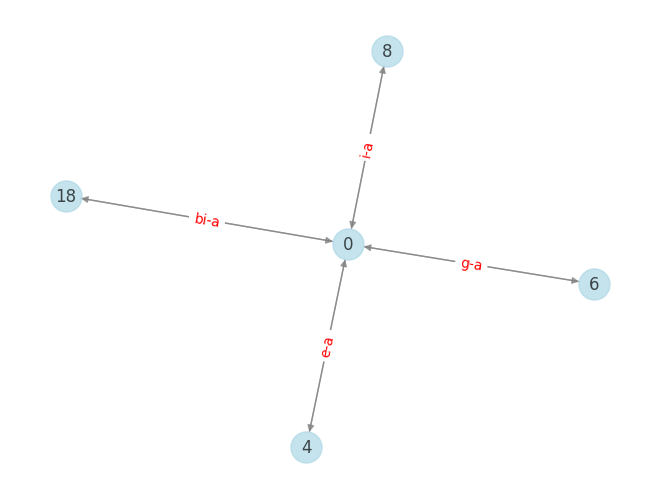

In [126]:

# Plot the graph
plt.figure()
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, edge_color='gray', width=1, alpha=0.7)
edge_labels = nx.get_edge_attributes(G, 'name')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
plt.show()

In [127]:
# Number of Nodes
num_nodes = G.number_of_nodes()
print("Number of nodes:", num_nodes)

# Number of Edges
num_edges = G.number_of_edges()
print("Number of edges:", num_edges)

Number of nodes: 5
Number of edges: 8


In [128]:
# Find and count leaf nodes
leaf_nodes = [node for node, degree in G.degree() if degree < 3]
# Find and count junction nodes (nodes with degree >= 3)
junction_nodes = [node for node, degree in G.degree() if degree >= 3]

print("Number of leaf nodes:", len(leaf_nodes))
print("Number of junction nodes:", len(junction_nodes))


Number of leaf nodes: 4
Number of junction nodes: 1


In [132]:
# Specify the node of interest
node_of_interest = 0

# Find the neighbors of the specified node
neighbors = list(G.neighbors(node_of_interest))
print(neighbors)

[4, 6, 8, 18]


In [133]:
G.nodes[4]['color'] = 'red'

In [134]:
G.nodes[4]

{'color': 'red'}

In [135]:
G.edges[4, 0]

{'name': 'e-a', 'weight': 40}

In [136]:
G[4][0]

{'name': 'e-a', 'weight': 40}

In [137]:
# Add Edges
G.add_edge(4, 11, name='Abbey_Road', weight=69)
G.add_edge(11, 8, name='Penny_Lane', weight=10)

# Remove node
G.remove_node(18)

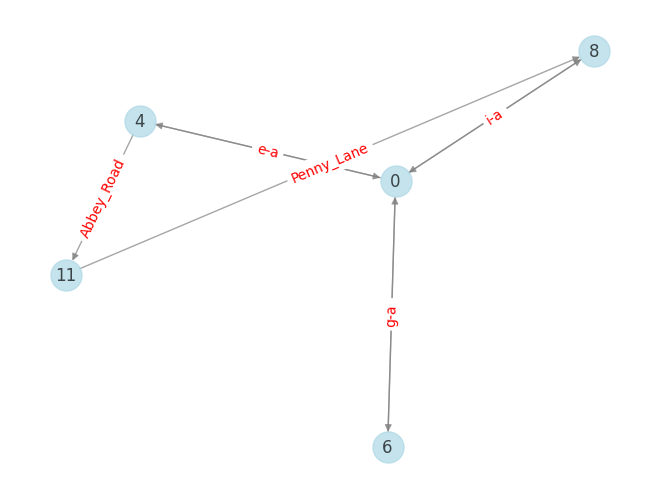

In [138]:

# Plot the graph
plt.figure()
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, edge_color='gray', width=1, alpha=0.7)
edge_labels = nx.get_edge_attributes(G, 'name')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
plt.show()

In [139]:
# Find the shortest path between nodes
source = 6
target = 11
shortest_path_nodes = nx.shortest_path(G, source=source, target=target)

print(f"Shortest path from {source} to {target}: {shortest_path_nodes}")

Shortest path from 6 to 11: [6, 0, 4, 11]


Nodes in the subgraph: [0, 4, 6, 11]
Edges in the subgraph: [(0, 4), (0, 6), (4, 0), (4, 11), (6, 0)]


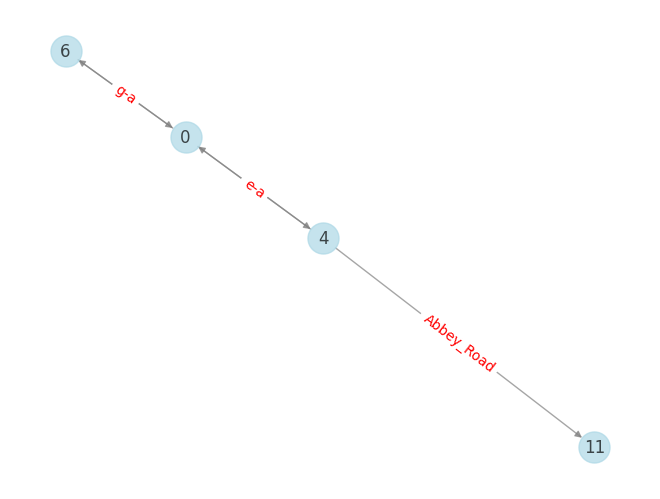

In [142]:

# Create a subgraph from the list of nodes
subgraph = G.subgraph(shortest_path_nodes)

print("Nodes in the subgraph:", subgraph.nodes())
print("Edges in the subgraph:", subgraph.edges())

# Plot the subgraph
plt.figure()
pos = nx.spring_layout(subgraph)
nx.draw(subgraph, pos, with_labels=True, node_color='lightblue', node_size=500, edge_color='gray', width=1, alpha=0.7)
edge_labels = nx.get_edge_attributes(subgraph, 'name')
nx.draw_networkx_edge_labels(subgraph, pos, edge_labels=edge_labels, font_color='red')
plt.show()


In [143]:
list(G.nodes())

[0, 4, 6, 8, 11]

Nodes in the subgraph: [0, 6]
Edges in the subgraph: [(0, 6), (6, 0)]


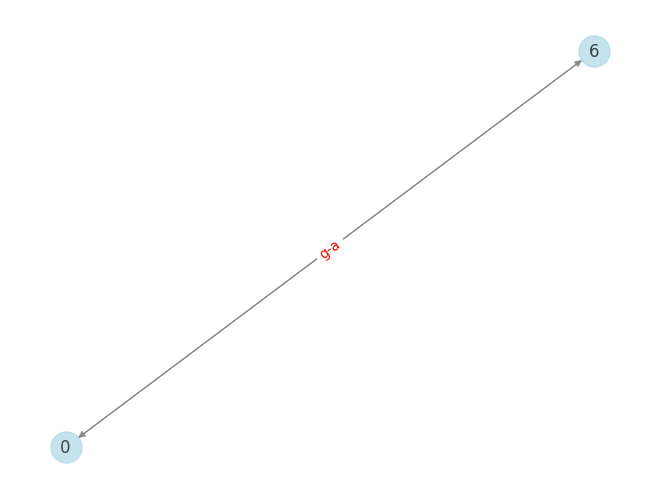

In [144]:
# Specify the node of interest
node_of_interest = 6

# Create a subgraph of nodes connected to the node with a cutoff of 1
subgraph = nx.ego_graph(G, node_of_interest, radius=1)

print("Nodes in the subgraph:", subgraph.nodes())
print("Edges in the subgraph:", subgraph.edges())

# Plot the subgraph
plt.figure()
pos = nx.spring_layout(subgraph)
nx.draw(subgraph, pos, with_labels=True, node_color='lightblue', node_size=500, edge_color='gray', width=1, alpha=0.7)
edge_labels = nx.get_edge_attributes(subgraph, 'name')
nx.draw_networkx_edge_labels(subgraph, pos, edge_labels=edge_labels, font_color='red')
plt.show()


In [108]:
# prompt: Download Manhattan streets edges using osmx
!pip install osmnx
import osmnx as ox
import networkx as nx

# Define the bounding box for Manhattan
north, south, east, west = 40.87, 40.75, -73.911, -74.0

# Download the street network for Manhattan
G = ox.graph_from_bbox(north, south, east, west, network_type='drive')

# Print the number of nodes and edges in the graph
print(f"Number of nodes: {len(G.nodes())}")
print(f"Number of edges: {len(G.edges())}")


<ipython-input-108-3d50c3feea49>:10: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  G = ox.graph_from_bbox(north, south, east, west, network_type='drive')


Number of nodes: 6253
Number of edges: 14457


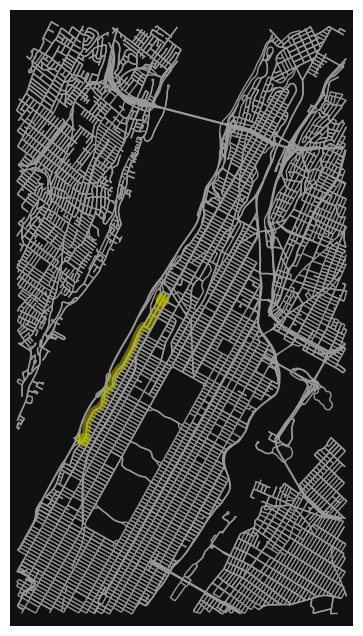

In [106]:
# find the shortest path (by distance) between these nodes then plot it
orig = list(G)[11]
dest = list(G)[24]
route = ox.shortest_path(G, orig, dest, weight="length")
fig, ax = ox.plot_graph_route(G, route, route_color="y", route_linewidth=6, node_size=0)

In [122]:
G[orig][42421776][0]

{'osmid': 5668968,
 'oneway': True,
 'lanes': '2',
 'name': 'West 80th Street',
 'highway': 'residential',
 'reversed': False,
 'length': 127.99200000000002,
 'geometry': <LINESTRING (-73.982 40.786, -73.982 40.786, -73.981 40.785, -73.981 40.785)>}

In [ ]:
!pip install osmnx
